In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [3]:
from imblearn.over_sampling import SMOTE

In [4]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [5]:
from sklearn.metrics import accuracy_score,roc_auc_score, confusion_matrix, classification_report,precision_score,recall_score,plot_roc_curve,log_loss
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,StackingClassifier,VotingClassifier,BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from xgboost import plot_tree,plot_importance
import statistics as st
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from tensorflow.keras.regularizers import l2
from sklearn.pipeline import make_pipeline
from pycaret.classification import *
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

2022-02-09 20:54:13.557647: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
sns.set(rc={"figure.figsize":(12, 4)}) #width=3, #height=4

In [8]:
from IPython.display import display
pd.options.display.max_columns = None

# Exploration of Data

In [9]:
df = pd.read_csv('aug_train.csv')
df.head(5)

enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM          5          NaN             NaN        never   
3  Business Degree         <1          NaN         Pvt Ltd        never   
4             STEM        >20        50-99  Funded Startup            4   

   training_hours  target  
0              36     1.0  
1              47     0.0  
2              83     0.0  
3              52     1.0  
4               8     0.0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [11]:
df_categorical = df.select_dtypes(include='object')
df_numerical = df.select_dtypes(exclude='object')

In [12]:
df_numerical.describe()

enrollee_id  city_development_index  training_hours        target
count  19158.000000            19158.000000    19158.000000  19158.000000
mean   16875.358179                0.828848       65.366896      0.249348
std     9616.292592                0.123362       60.058462      0.432647
min        1.000000                0.448000        1.000000      0.000000
25%     8554.250000                0.740000       23.000000      0.000000
50%    16982.500000                0.903000       47.000000      0.000000
75%    25169.750000                0.920000       88.000000      0.000000
max    33380.000000                0.949000      336.000000      1.000000

In [13]:
df_categorical.describe()

city gender      relevent_experience enrolled_university  \
count      19158  14650                    19158               18772   
unique       123      3                        2                   3   
top     city_103   Male  Has relevent experience       no_enrollment   
freq        4355  13221                    13792               13817   

       education_level major_discipline experience company_size company_type  \
count            18698            16345      19093        13220        13018   
unique               5                6         22            8            6   
top           Graduate             STEM        >20        50-99      Pvt Ltd   
freq             11598            14492       3286         3083         9817   

       last_new_job  
count         18735  
unique            6  
top               1  
freq           8040

In [14]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [15]:
def missing_data(df):
    a = df.isnull().sum()
    a=a.tolist()
    percent_missing = [ int(x)* 100 / len(df) for x in a]
    error_per = pd.DataFrame({
        'Columns':df.columns,         
        'Total error': a,
        'Error Percentage': percent_missing
    })
    print(tabulate(error_per, headers=['column','total error','error percentage']))
    sns.barplot(x='Columns',y='Error Percentage',data=error_per)
    plt.ylabel('error %')
    plt.xticks(rotation=70)

    column                    total error    error percentage
--  ----------------------  -------------  ------------------
 0  enrollee_id                         0            0
 1  city                                0            0
 2  city_development_index              0            0
 3  gender                           4508           23.5306
 4  relevent_experience                 0            0
 5  enrolled_university               386            2.01482
 6  education_level                   460            2.40109
 7  major_discipline                 2813           14.6832
 8  experience                         65            0.339284
 9  company_size                     5938           30.9949
10  company_type                     6140           32.0493
11  last_new_job                      423            2.20795
12  training_hours                      0            0
13  target                              0            0


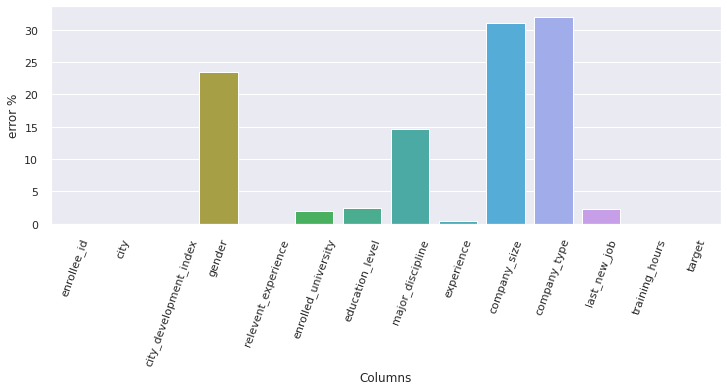

In [16]:
missing_data(df)

In [17]:
def get_all_unique_values(df):
    df_empty = {}
    for i in df.columns:
        df_empty[i] = df[i].unique()
    return df_empty

In [18]:
unique_val=get_all_unique_values(df)
unique_val

{'enrollee_id': array([ 8949, 29725, 11561, ..., 24576,  5756, 23834]),
 'city': array(['city_103', 'city_40', 'city_21', 'city_115', 'city_162',
        'city_176', 'city_160', 'city_46', 'city_61', 'city_114',
        'city_13', 'city_159', 'city_102', 'city_67', 'city_100',
        'city_16', 'city_71', 'city_104', 'city_64', 'city_101', 'city_83',
        'city_105', 'city_73', 'city_75', 'city_41', 'city_11', 'city_93',
        'city_90', 'city_36', 'city_20', 'city_57', 'city_152', 'city_19',
        'city_65', 'city_74', 'city_173', 'city_136', 'city_98', 'city_97',
        'city_50', 'city_138', 'city_82', 'city_157', 'city_89',
        'city_150', 'city_70', 'city_175', 'city_94', 'city_28', 'city_59',
        'city_165', 'city_145', 'city_142', 'city_26', 'city_12',
        'city_37', 'city_43', 'city_116', 'city_23', 'city_99', 'city_149',
        'city_10', 'city_45', 'city_80', 'city_128', 'city_158',
        'city_123', 'city_7', 'city_72', 'city_106', 'city_143', 'city_7

<AxesSubplot:xlabel='city_development_index', ylabel='Density'>

<AxesSubplot:xlabel='city_development_index', ylabel='Density'>

<AxesSubplot:xlabel='city_development_index', ylabel='Density'>

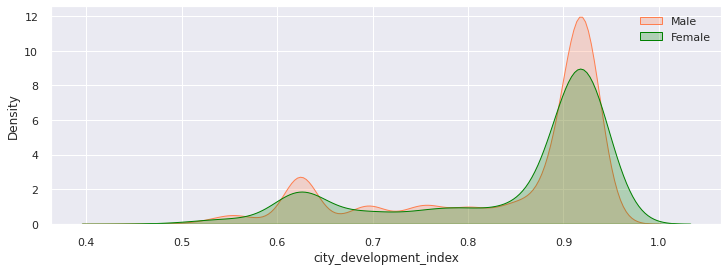

In [19]:
sns.kdeplot(data=df[df.gender == 'Male'],x='city_development_index',shade=True,color='coral',label='Male')
sns.kdeplot(data=df[df.gender == 'Female'],x='city_development_index',shade=True,color='green',label='Female')
sns.kdeplot(data=df[df.gender == 'Others'],x='city_development_index',shade=True,color='blue',label='Others')
plt.legend()

<AxesSubplot:xlabel='city_development_index', ylabel='Density'>

<AxesSubplot:xlabel='city_development_index', ylabel='Density'>

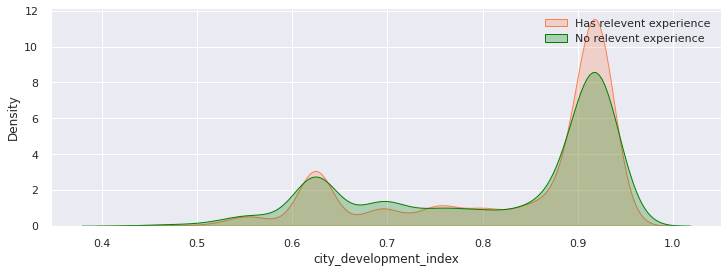

In [20]:
sns.kdeplot(data=df[df.relevent_experience == 'Has relevent experience'],x='city_development_index',shade=True,color='coral',label='Has relevent experience')
sns.kdeplot(data=df[df.relevent_experience == 'No relevent experience'],x='city_development_index',shade=True,color='green',label='No relevent experience')
plt.legend()

<AxesSubplot:xlabel='city_development_index', ylabel='Density'>

<AxesSubplot:xlabel='city_development_index', ylabel='Density'>

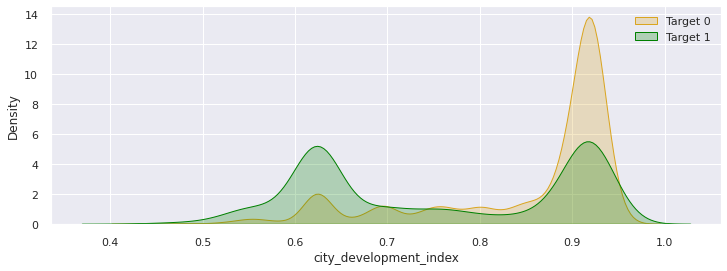

In [21]:
sns.kdeplot(data=df[df.target == 0],x='city_development_index',shade=True,color='goldenrod',label='Target 0')
sns.kdeplot(data=df[df.target == 1],x='city_development_index',shade=True,color='green',label='Target 1')
plt.legend()

In [22]:
df_c = df.copy(deep=True)

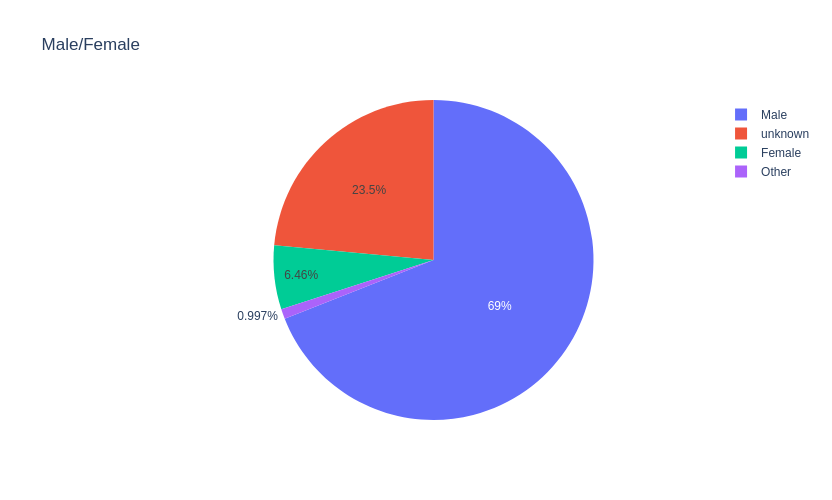

In [23]:
df_c['gender'].fillna('unknown',inplace=True)
df_gender_val = df_c['gender'].value_counts().reset_index()
df_gender_val.columns = [
    'gender', 
    'percent'
]
df_gender_val['percent'] /= len(df_c)

fig = px.pie(
    df_gender_val, 
    names='gender', 
    values='percent', 
    title='Male/Female', 
    width=800,
    height=500 
)

fig.show()

In [24]:
df_c['experience']=df_c['experience'].replace('>20','25')
df_c['experience']=df_c['experience'].replace('<1','0.5')    
df_c["experience"] = pd.to_numeric(df_c["experience"])

<AxesSubplot:xlabel='experience', ylabel='Density'>

<AxesSubplot:xlabel='experience', ylabel='Density'>

<AxesSubplot:xlabel='experience', ylabel='Density'>

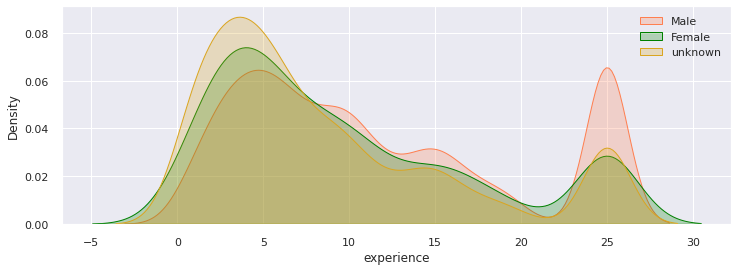

In [25]:
sns.kdeplot(data=df_c[df_c.gender == 'Male'],x='experience',shade=True,color='coral',label='Male')
sns.kdeplot(data=df_c[df_c.gender == 'Female'],x='experience',shade=True,color='green',label='Female')
sns.kdeplot(data=df_c[df_c.gender == 'unknown'],x='experience',shade=True,color='goldenrod',label='unknown')
plt.legend()

<Figure size 1080x2520 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='relevent_experience', ylabel='count'>

Text(0.5, 1.0, 'Countplot of relevent_experience  by gender')

<AxesSubplot:>

<AxesSubplot:xlabel='enrolled_university', ylabel='count'>

Text(0.5, 1.0, 'Countplot of enrolled_university  by gender')

<AxesSubplot:>

<AxesSubplot:xlabel='education_level', ylabel='count'>

Text(0.5, 1.0, 'Countplot of education_level  by gender')

<AxesSubplot:>

<AxesSubplot:xlabel='major_discipline', ylabel='count'>

Text(0.5, 1.0, 'Countplot of major_discipline  by gender')

<AxesSubplot:>

<AxesSubplot:xlabel='company_size', ylabel='count'>

Text(0.5, 1.0, 'Countplot of company_size  by gender')

<AxesSubplot:>

<AxesSubplot:xlabel='company_type', ylabel='count'>

Text(0.5, 1.0, 'Countplot of company_type  by gender')

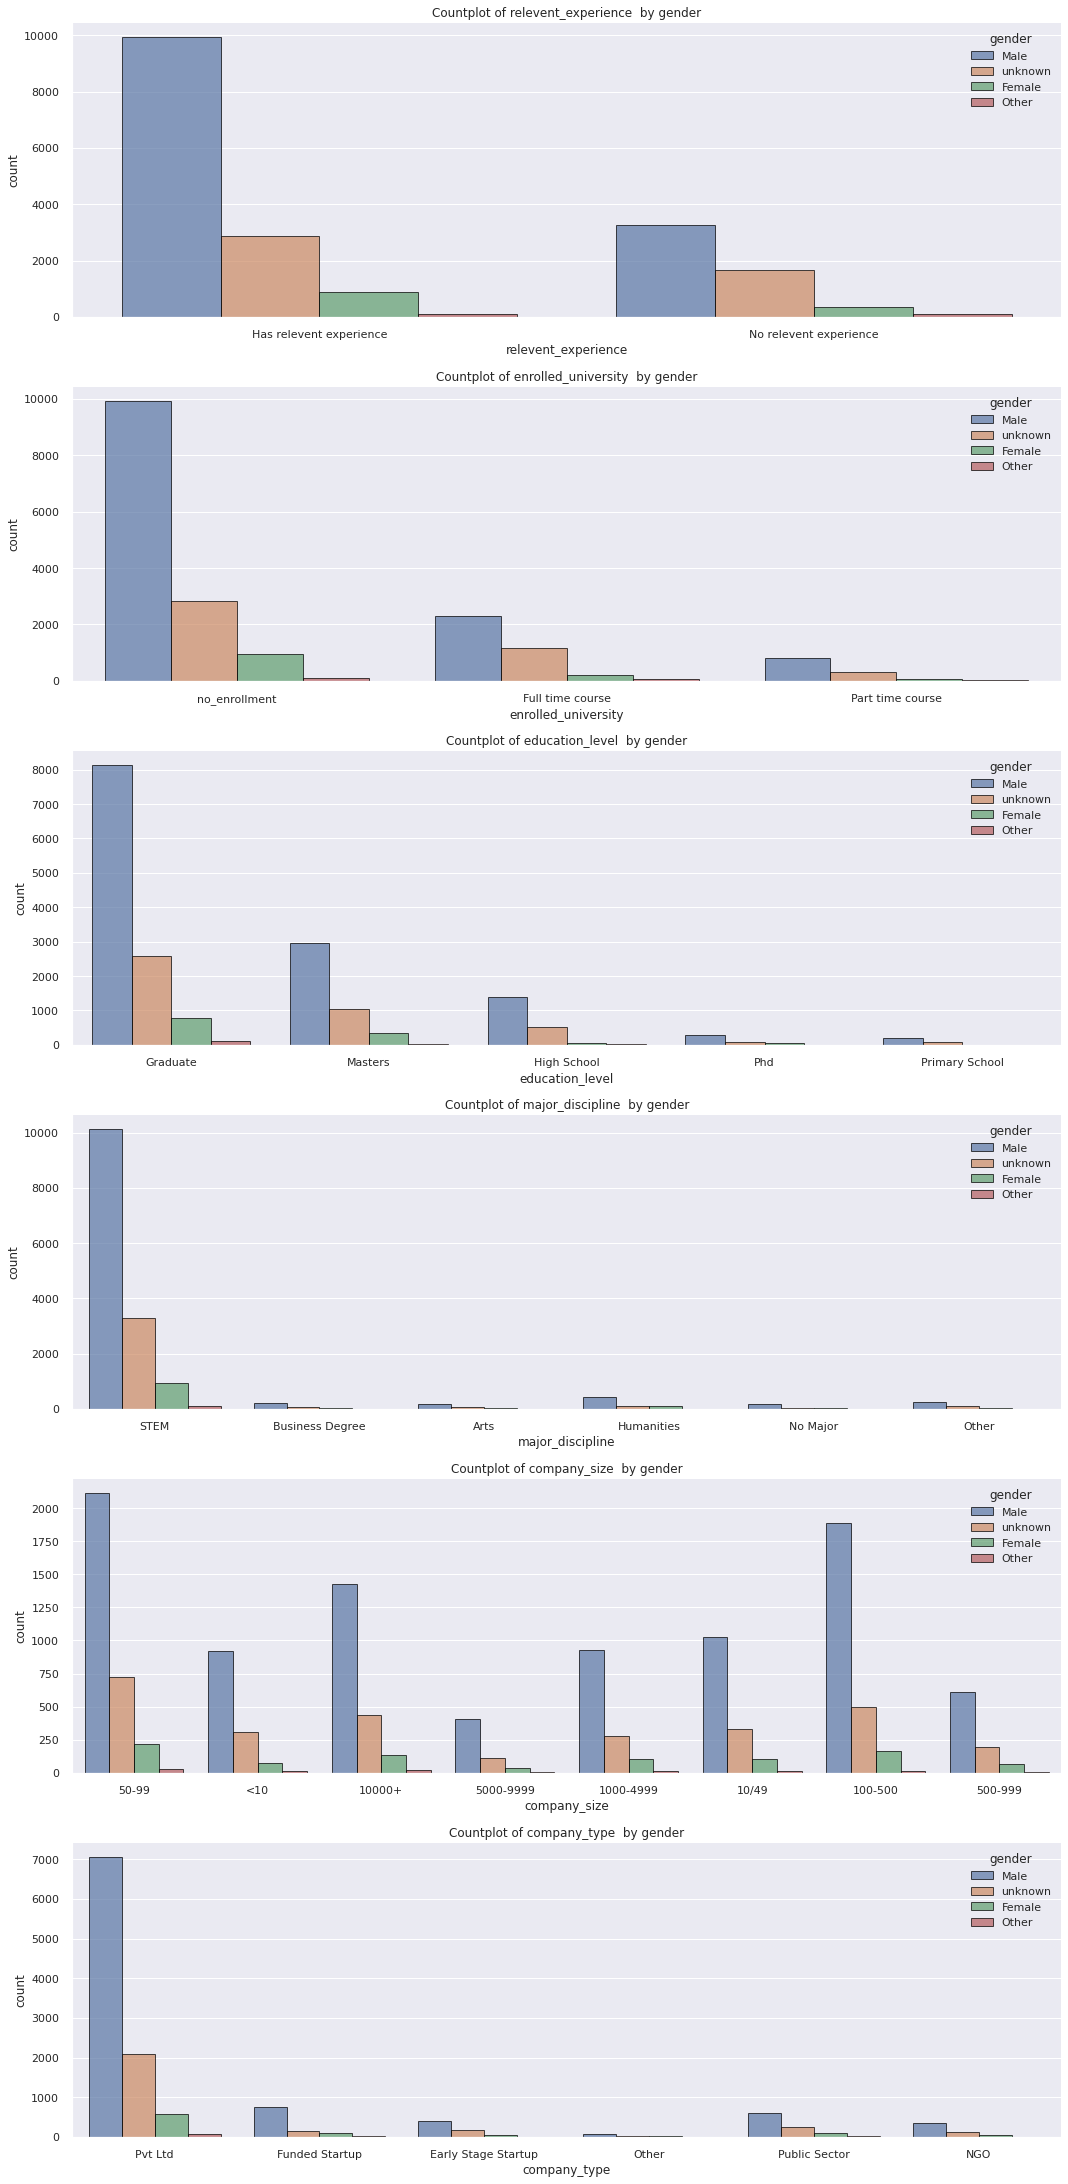

In [26]:
plot = ['relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline','company_size', 'company_type']
plt.figure(figsize=[15,35])
n=1
for f in plot:
    plt.subplots_adjust(hspace=2)
    plt.subplot(7,1,n)
    
    sns.countplot(x=f, hue='gender', edgecolor="black", alpha=0.7, data=df_c)
    sns.despine()
    plt.title("Countplot of {}  by gender".format(f))
    n=n+1
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='target', ylabel='count'>

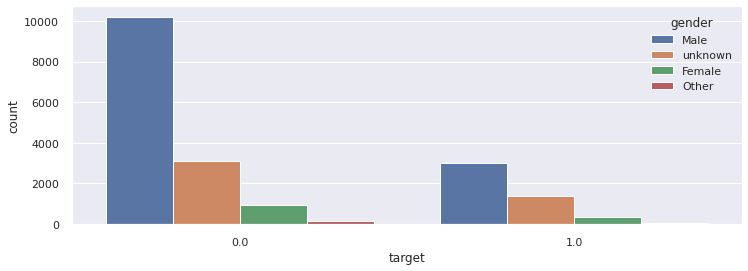

In [27]:
sns.countplot(x='target',hue='gender',data=df_c)

<AxesSubplot:xlabel='target', ylabel='count'>

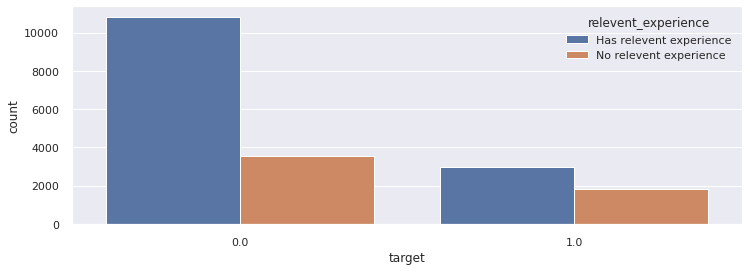

In [28]:
sns.countplot(x='target',hue='relevent_experience',data=df_c)

<AxesSubplot:xlabel='education_level', ylabel='count'>

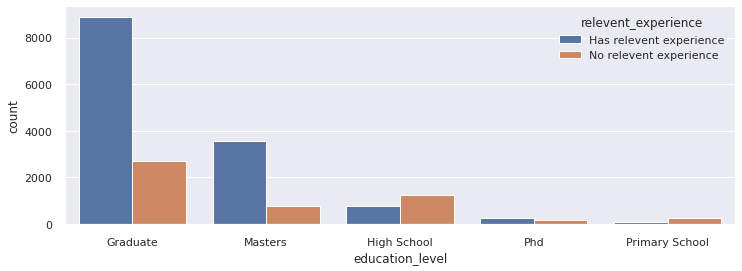

In [29]:
sns.countplot(x='education_level',hue='relevent_experience',data=df_c)

<AxesSubplot:xlabel='company_size', ylabel='count'>

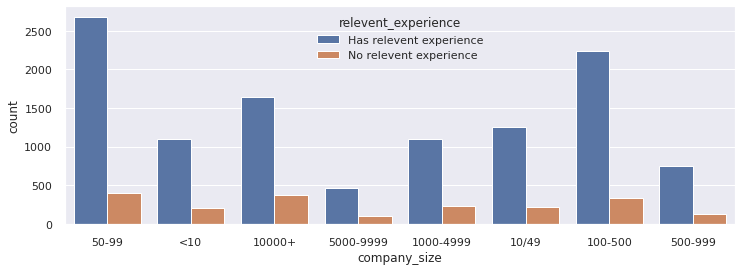

In [30]:
sns.countplot(x='company_size',hue='relevent_experience',data=df_c)

<AxesSubplot:xlabel='major_discipline', ylabel='count'>

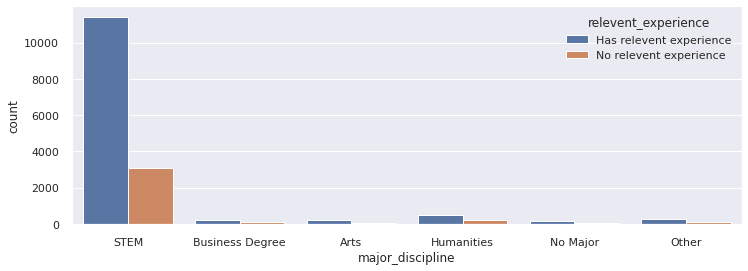

In [31]:
sns.countplot(x='major_discipline',hue='relevent_experience',data=df_c)

<AxesSubplot:xlabel='company_type', ylabel='count'>

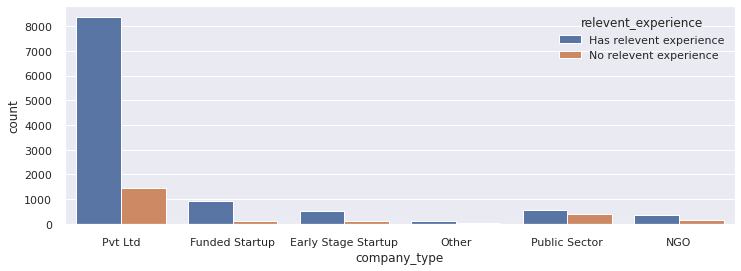

In [32]:
sns.countplot(x='company_type',hue='relevent_experience',data=df_c)

<AxesSubplot:xlabel='training_hours', ylabel='Density'>

<AxesSubplot:xlabel='training_hours', ylabel='Density'>

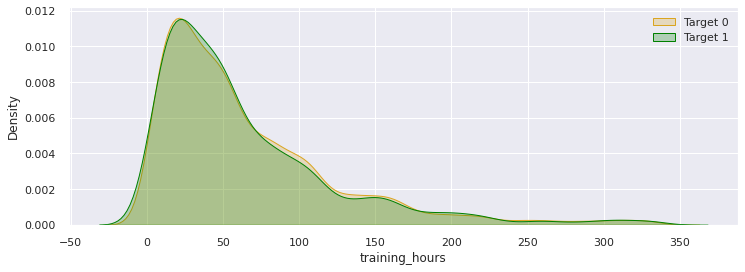

In [33]:
sns.kdeplot(data=df_c[df_c.relevent_experience == 'Has relevent experience'],x='training_hours',shade=True,color='goldenrod',label='Target 0')
sns.kdeplot(data=df_c[df_c.relevent_experience == 'No relevent experience'],x='training_hours',shade=True,color='green',label='Target 1')
plt.legend()

<AxesSubplot:xlabel='experience', ylabel='Density'>

<AxesSubplot:xlabel='experience', ylabel='Density'>

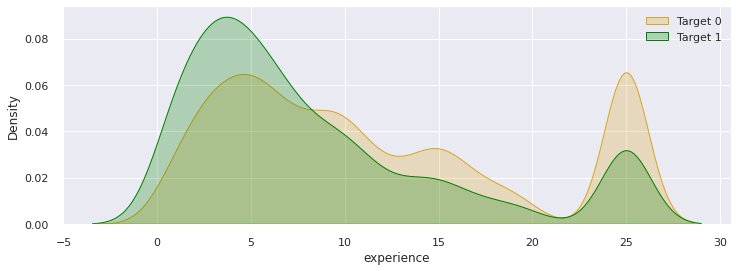

In [34]:
sns.kdeplot(data=df_c[df_c.target == 0],x='experience',shade=True,color='goldenrod',label='Target 0')
sns.kdeplot(data=df_c[df_c.target == 1],x='experience',shade=True,color='green',label='Target 1')
plt.legend()

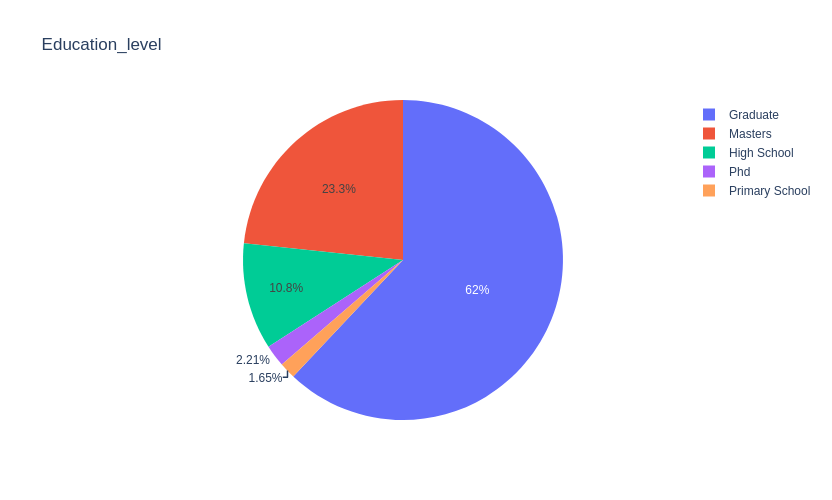

In [35]:
el = df['education_level'].value_counts().reset_index()
el.columns = [
    'education_level', 
    'percent'
]
el['percent'] /= len(df)

fig = px.pie(
    el, 
    names='education_level', 
    values='percent', 
    title='Education_level', 
    width=800,
    height=500 
)

fig.show()

<AxesSubplot:xlabel='company_type', ylabel='count'>

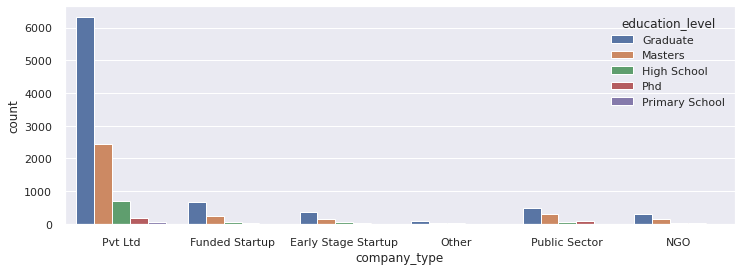

In [36]:
sns.countplot(x='company_type',hue='education_level',data=df_c)

<AxesSubplot:xlabel='company_size', ylabel='count'>

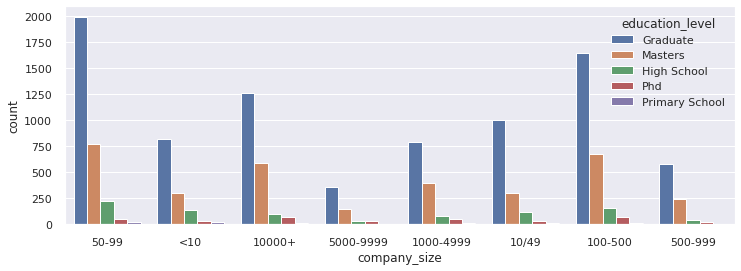

In [37]:
sns.countplot(x='company_size',hue='education_level',data=df_c)

<AxesSubplot:xlabel='target', ylabel='count'>

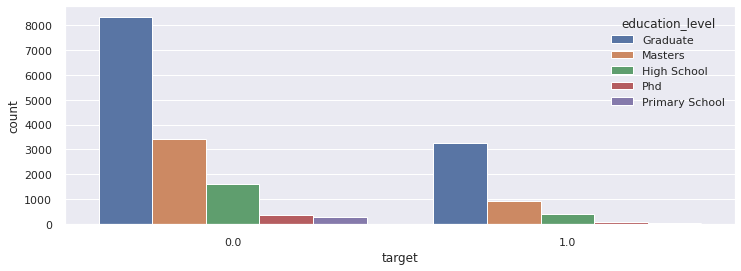

In [38]:
sns.countplot(hue='education_level',x='target',data=df_c)

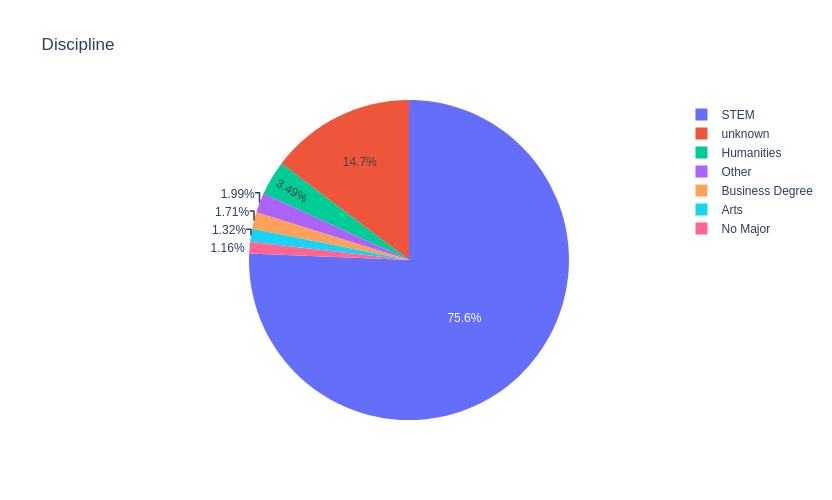

In [39]:
df_c['major_discipline'].fillna('unknown',inplace=True)
md = df_c['major_discipline'].value_counts().reset_index()

md.columns = [
    'major_discipline', 
    'percent'
]
md['percent'] /= len(df)

fig = px.pie(
    md, 
    names='major_discipline',
    values='percent', 
    title='Discipline', 
    width=800,
    height=500 
)

fig.show()

<AxesSubplot:xlabel='major_discipline', ylabel='count'>

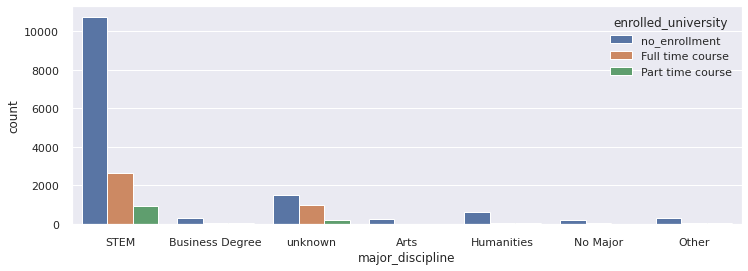

In [40]:
sns.countplot(x='major_discipline',hue='enrolled_university',data=df_c)

<AxesSubplot:xlabel='company_type', ylabel='count'>

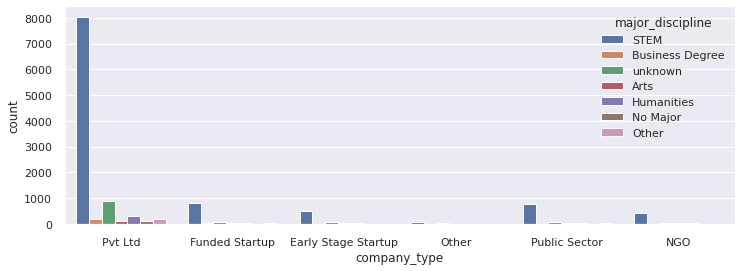

In [41]:
sns.countplot(x='company_type',hue='major_discipline',data=df_c)

<AxesSubplot:xlabel='target', ylabel='count'>

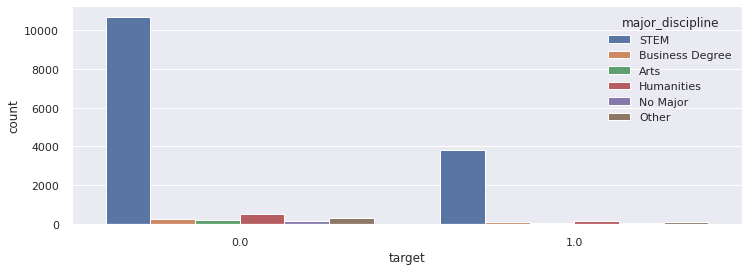

In [42]:
sns.countplot(x='target',hue='major_discipline',data=df)

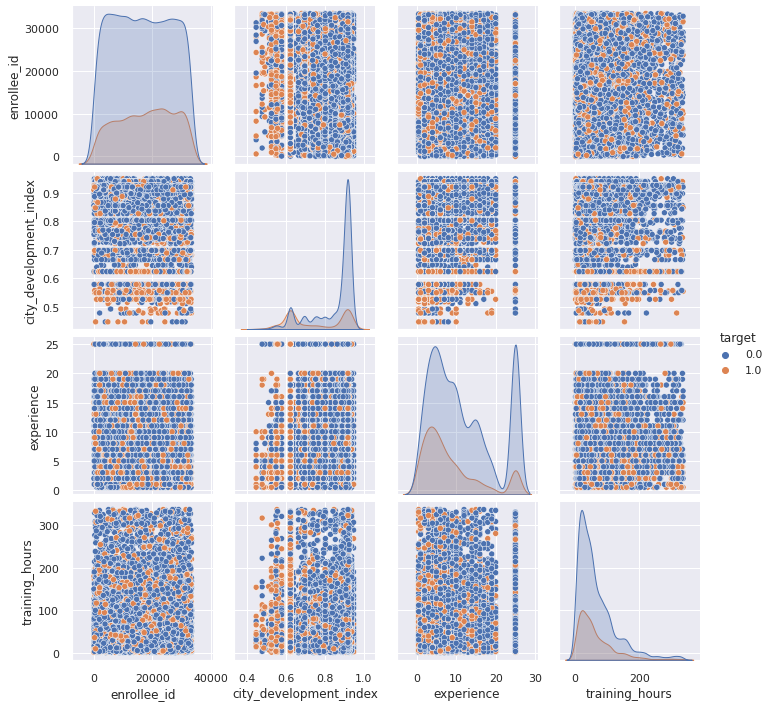

In [43]:
sns.pairplot(hue='target',data=df_c)

In [44]:
def relation_bet_three_var(i,j,k):
    cum_something = df[[i,j,k]]
    cum_something=cum_something.dropna(how='any')
    cum_something=cum_something.pivot_table(index=i,columns=j,values=k,aggfunc='mean')
    fig = px.imshow(cum_something,aspect='auto',title=k)
    fig.show()

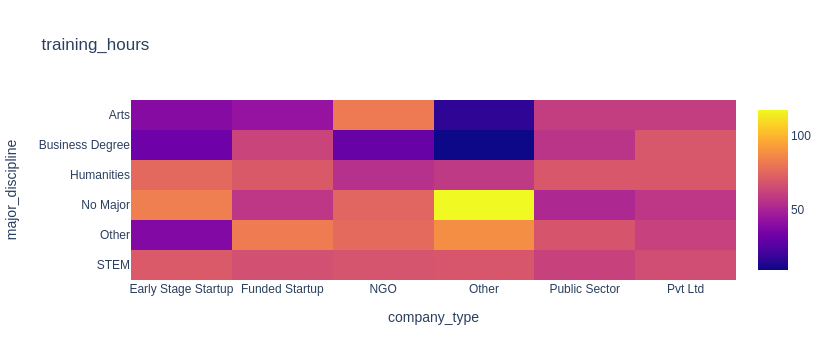

In [45]:
relation_bet_three_var('major_discipline','company_type','training_hours')

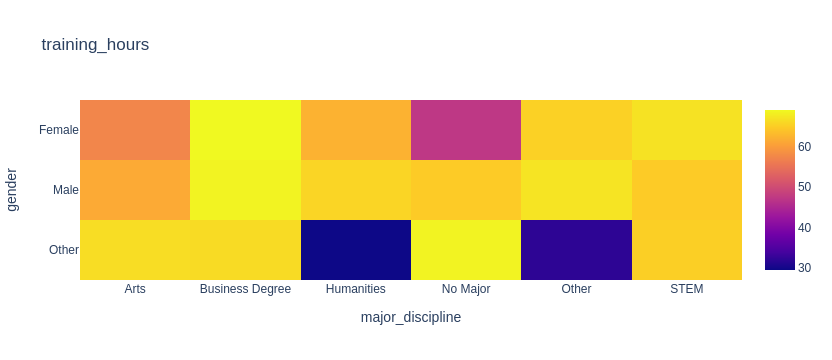

In [46]:
relation_bet_three_var('gender','major_discipline','training_hours')

# Data Cleaning

In [47]:
def null_filler_normal(df):
    #experience,enrolled_university,last_new_job,education_level
    df["enrolled_university"].fillna("no_enrollment", inplace = True)
    df['experience']=df['experience'].replace('>20','25')
    df['experience']=df['experience'].replace('<1','0.5')    
    df["experience"] = pd.to_numeric(df["experience"])
    df["experience"].fillna(df['experience'].mean(), inplace = True) 
    df['last_new_job']=df['last_new_job'].replace('>4','6')
    df['last_new_job']=df['last_new_job'].replace('never','20')
    df["last_new_job"] = pd.to_numeric(df["last_new_job"])
    df["last_new_job"].fillna(df['last_new_job'].mean(), inplace = True)
    df["education_level"].fillna("Graduate", inplace = True)
    df['gender']=df['gender'].replace('Other','Other_gender')
    df['gender']=df['gender'].replace('Other','Other_gender')
    df['major_discipline']=df['major_discipline'].replace('Other','Other_Major_discipline')
    df['company_type']=df['company_type'].replace('Other','Other_Company')

    return df

In [48]:
def null_ratio_filler(df,column):
    df_per = df[column].value_counts().reset_index()
    df.set_index('enrollee_id',inplace=True)
    for i in range(len(df_per)):
        ratio = df_per[column][i]/df_per[column][i:].sum()
        null_df=df[df[column].isna() == True]
        temp_feature_df = null_df.sample(frac = ratio,random_state=2)
        feature = df_per['index'][i]
        temp_feature_df[column].fillna(feature,inplace=True)
        df.update(temp_feature_df)
    df[column].fillna(df_per['index'][0],inplace=True)
    return df.reset_index()

In [49]:
def encoding_data(df):
    for i in ['gender','company_type','major_discipline','enrolled_university']:
        dummies=pd.get_dummies(df[i])
        df = pd.concat([df,dummies],axis='columns')
    df['relevent_experience'] = df['relevent_experience'].map({'No relevent experience':'1',
                                                                             'Has relevent experience':'9'})
    df['education_level'] = df['education_level'].map({'Graduate':'4',
                                                                 'Masters':'5',
                                                                 'Phd':'6',
                                                                 'High School':'3',
                                                                 'Primary School':'2'
                                                                })
    df['company_size'] = df['company_size'].map({'50-99':'75',
                                                                 '<10':'5',
                                                                 '5000-9999':'8000',
                                                                 '1000-4999':'2500',
                                                                 '10/49':'30',
                                                                 '100-500':'750',
                                                                 '10000+':'15000',
                                                                 '500-999':'700'})
    df = df.drop(columns=['company_type','gender','major_discipline','enrolled_university'])
    for i in df.columns:
        df[i]=df[i].astype('float64')
    return df

In [50]:
def cleaned_usable(df):
    df = null_ratio_filler(df,'gender')
    df = null_ratio_filler(df,'major_discipline')
    df = null_ratio_filler(df,'company_size')
    df = null_ratio_filler(df,'company_type')
    df = null_filler_normal(df)
    df = df.drop(columns=['enrollee_id','city'])
    df = df.dropna(how='any')
    df = encoding_data(df)
    return df

In [51]:
df = cleaned_usable(df)

    column                    total error    error percentage
--  ----------------------  -------------  ------------------
 0  city_development_index              0                   0
 1  relevent_experience                 0                   0
 2  education_level                     0                   0
 3  experience                          0                   0
 4  company_size                        0                   0
 5  last_new_job                        0                   0
 6  training_hours                      0                   0
 7  target                              0                   0
 8  Female                              0                   0
 9  Male                                0                   0
10  Other_gender                        0                   0
11  Early Stage Startup                 0                   0
12  Funded Startup                      0                   0
13  NGO                                 0                   0
14  Othe

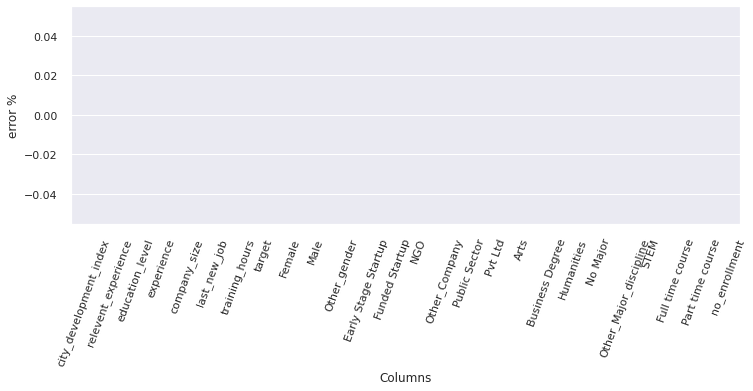

In [52]:
missing_data(df)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19158 entries, 0 to 19157
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  19158 non-null  float64
 1   relevent_experience     19158 non-null  float64
 2   education_level         19158 non-null  float64
 3   experience              19158 non-null  float64
 4   company_size            19158 non-null  float64
 5   last_new_job            19158 non-null  float64
 6   training_hours          19158 non-null  float64
 7   target                  19158 non-null  float64
 8   Female                  19158 non-null  float64
 9   Male                    19158 non-null  float64
 10  Other_gender            19158 non-null  float64
 11  Early Stage Startup     19158 non-null  float64
 12  Funded Startup          19158 non-null  float64
 13  NGO                     19158 non-null  float64
 14  Other_Company           19158 non-null

## Outlier deletion 

<AxesSubplot:>

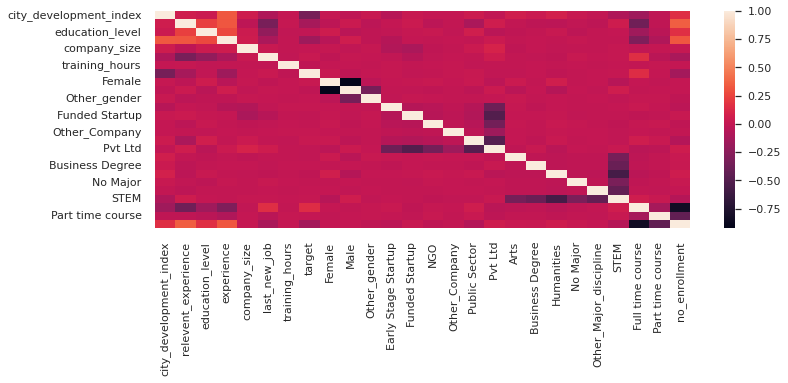

In [54]:
sns.heatmap(df.corr())

In [55]:
corr = df.corr()
corr['experience'].sort_values()

Full time course         -0.305606
target                   -0.169042
last_new_job             -0.108070
Part time course         -0.082767
Early Stage Startup      -0.063525
Female                   -0.049168
Other_gender             -0.018490
Public Sector            -0.005157
Other_Major_discipline   -0.003095
STEM                     -0.003093
Arts                     -0.002009
NGO                      -0.001836
Humanities               -0.001768
training_hours           -0.000315
Other_Company             0.000825
Funded Startup            0.003106
Business Degree           0.007716
No Major                  0.008337
Pvt Ltd                   0.032852
company_size              0.047437
Male                      0.053163
education_level           0.266253
relevent_experience       0.318880
no_enrollment             0.322870
city_development_index    0.327753
experience                1.000000
Name: experience, dtype: float64

# Data scaling

<AxesSubplot:xlabel='target', ylabel='count'>

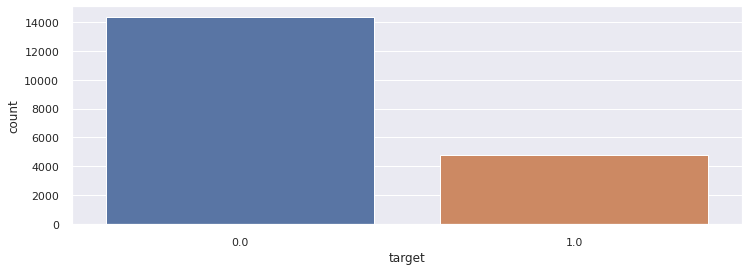

In [56]:
sns.countplot('target',data=df)

In [57]:
x_train = df.drop("target",axis=1)
y_train = pd.DataFrame(df["target"])

In [58]:
x_train.columns

Index(['city_development_index', 'relevent_experience', 'education_level',
       'experience', 'company_size', 'last_new_job', 'training_hours',
       'Female', 'Male', 'Other_gender', 'Early Stage Startup',
       'Funded Startup', 'NGO', 'Other_Company', 'Public Sector', 'Pvt Ltd',
       'Arts', 'Business Degree', 'Humanities', 'No Major',
       'Other_Major_discipline', 'STEM', 'Full time course',
       'Part time course', 'no_enrollment'],
      dtype='object')

# Model training

In [59]:
smote = SMOTE()
x_train, y_train = smote.fit_resample(x_train, y_train)

In [60]:
#scaler_x = MinMaxScaler()
#x_train = scaler_x.fit_transform(x_train)

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.20,stratify=y_train)

In [64]:
model = RandomForestClassifier(n_estimators=75)

In [65]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=75)

In [67]:
model.score(x_test,y_test)

0.8430384147401356

In [71]:
y_pred = model.predict(x_test)

In [73]:
cf_matrix = confusion_matrix( y_test, y_pred)

<AxesSubplot:>

Text(0.5, 9.0, 'predicted')

Text(81.0, 0.5, 'actual')

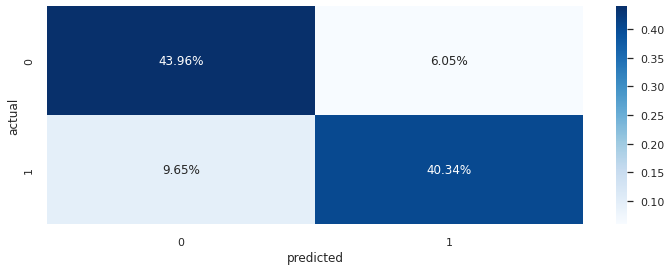

In [79]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('actual')

In [83]:
auc = np.round(roc_auc_score(y_test, y_pred), 3)
 
print("Auc for our sample data is {}". format(auc))

Auc for our sample data is 0.843
